# Version 6

This includes a mechanism that will evaluate the rolling return, and put on momentum positions when the trade is performing particularly well. 

This differs from combining Reversion and Momentum parameter settings in that it switches between the two paradigms as a part of the portfolio construction.

It appears that we can reduce volatility in this manner, though it deserves to be studied further given the complication.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.score_vars import ScoreVariables
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [3]:
run0 = RunManager('StatArbStrategy', 'run_0134')
run1 = RunManager('StatArbStrategy', 'run_0135')
run2 = RunManager('StatArbStrategy', 'run_0136')
run3 = RunManager('StatArbStrategy', 'run_0137')

In [4]:
run0.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,288,0.920502,0.089694,-999.0
1,drop_binaries,False,288,0.920502,0.089694,-999.0
2,holding_period,3,96,0.870828,0.077634,-999.0
3,holding_period,5,96,0.958037,0.094096,-999.0
4,holding_period,7,96,0.932641,0.097352,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.920502,0.089694,-999.0
6,momentum_var,0.002,72,0.701666,0.078101,-999.0
7,momentum_var,0.005,72,0.856742,0.090048,-999.0
8,momentum_var,0.01,72,0.998372,0.095913,-999.0
9,momentum_var,None,72,1.125227,0.094714,-999.0


In [5]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,288,0.401716,0.036994,-999.0
1,drop_binaries,False,288,0.401716,0.036994,-999.0
2,holding_period,3,96,0.384600,0.032672,-999.0
3,holding_period,5,96,0.431289,0.039798,-999.0
4,holding_period,7,96,0.389258,0.038511,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.401716,0.036994,-999.0
6,momentum_var,0.002,72,0.270322,0.029287,-999.0
7,momentum_var,0.005,72,0.369143,0.036371,-999.0
8,momentum_var,0.01,72,0.403494,0.036984,-999.0
9,momentum_var,None,72,0.563903,0.045332,-999.0


In [6]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,288,0.654181,0.047412,-999.0
1,drop_binaries,False,288,0.654181,0.047412,-999.0
2,holding_period,3,96,0.635879,0.043142,-999.0
3,holding_period,5,96,0.671810,0.048729,-999.0
4,holding_period,7,96,0.654853,0.050364,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.654181,0.047412,-999.0
6,momentum_var,0.002,72,0.439679,0.038140,-999.0
7,momentum_var,0.005,72,0.559672,0.044104,-999.0
8,momentum_var,0.01,72,0.697096,0.049424,-999.0
9,momentum_var,None,72,0.920276,0.057979,-999.0


In [7]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,288,0.372006,0.036897,-999.0
1,drop_binaries,False,288,0.372006,0.036897,-999.0
2,holding_period,3,96,0.500415,0.046226,-999.0
3,holding_period,5,96,0.332618,0.033719,-999.0
4,holding_period,7,96,0.282984,0.030745,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.372006,0.036897,-999.0
6,momentum_var,0.002,72,0.306733,0.033983,-999.0
7,momentum_var,0.005,72,0.342092,0.035747,-999.0
8,momentum_var,0.01,72,0.385349,0.037375,-999.0
9,momentum_var,None,72,0.453849,0.040482,-999.0


# Sector 20

Compare the two Momentum/Reversion ideas: run 130 vs. run 134

In [10]:
# Import reversion/momentum models from v6
runA1 = RunManager('StatArbStrategy', 'run_0130')
drop_params = [('momentum_flag', True)]
runA2 = RunManager('StatArbStrategy', 'run_0130', drop_params=drop_params)

In [11]:
comb0 = CombinationSearch()
comb0.set_selection_criteria('sharpe')
comb0.params['training_epochs'] = 5
comb0.add_run(run0)
comb0.start()

  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:53<00:00, 10.61s/it]


In [12]:
combA1 = CombinationSearch()
combA1.set_selection_criteria('sharpe')
combA1.params['training_epochs'] = 5
combA1.add_run(runA1)
combA1.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:57<00:00, 11.51s/it]


In [13]:
combA2 = CombinationSearch()
combA2.set_selection_criteria('sharpe')
combA2.params['training_epochs'] = 5
combA2.add_run(runA2)
combA2.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:54<00:00, 10.83s/it]


# Plot results

The reversion only appears to be the best since 2010, but considering just 2013 and onwards, it is a mixed bag.

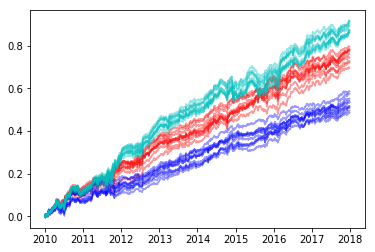

In [14]:
plt.figure()
# V6 Switch
plt.plot(comb0.best_results_returns.dropna().cumsum(), 'r', alpha=0.4)
# V5 Momentum/Reversion
plt.plot(combA1.best_results_returns.dropna().cumsum(), 'b', alpha=0.4)
# V5 Reversion only
plt.plot(combA2.best_results_returns.dropna().cumsum(), 'c', alpha=0.4)
plt.show()

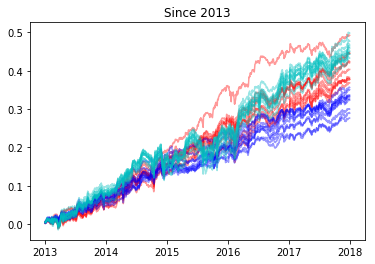

In [16]:
d = dt.date(2013, 1, 1)

plt.figure()
# V6 Switch
plt.plot(comb0.best_results_returns.loc[d:].dropna().cumsum(), 'r', alpha=0.4)
# V5 Momentum/Reversion
plt.plot(combA1.best_results_returns.loc[d:].dropna().cumsum(), 'b', alpha=0.4)
# V5 Reversion only
plt.plot(combA2.best_results_returns.loc[d:].dropna().cumsum(), 'c', alpha=0.4)
plt.title('Since 2013')
plt.show()

# Stats

In [22]:
df = pd.DataFrame()
df['V6Switch'] = get_stats(comb0.best_results_returns.dropna()).mean(axis=1)
df['V5MomRev'] = get_stats(combA1.best_results_returns.dropna()).mean(axis=1)
df['V5Rev'] = get_stats(combA2.best_results_returns.dropna()).mean(axis=1)
df

,V6Switch,V5MomRev,V5Rev
Total,0.75566,0.53051,0.88552
Mean,0.00039,0.00028,0.00043
Std,0.00301,0.00250,0.00388
Skew,0.36685,0.29061,0.24761
Kurt,2.18000,2.61000,2.43800
Sharpe,1.97492,1.66670,1.79950
Sortino,3.72119,3.03259,3.27979
MinRet,-0.01235,-0.01124,-0.01875
WinP,0.54736,0.54500,0.55281
DD%,-0.04619,-0.04393,-0.06455


In [23]:
d = dt.date(2013, 1, 1)

df = pd.DataFrame()
df['V6Switch'] = get_stats(comb0.best_results_returns.loc[d:].dropna()).mean(axis=1)
df['V5MomRev'] = get_stats(combA1.best_results_returns.loc[d:].dropna()).mean(axis=1)
df['V5Rev'] = get_stats(combA2.best_results_returns.loc[d:].dropna()).mean(axis=1)
df

,V6Switch,V5MomRev,V5Rev
Total,0.41370,0.32242,0.45835
Mean,0.00033,0.00027,0.00039
Std,0.00286,0.00228,0.00353
Skew,0.24150,0.01283,0.00954
Kurt,2.15900,0.91000,1.83500
Sharpe,1.81886,1.78921,1.63823
Sortino,3.35093,3.21158,2.89368
MinRet,-0.01183,-0.00899,-0.01503
WinP,0.54391,0.54948,0.54640
DD%,-0.04619,-0.02655,-0.06455


# Baseline Comparison

Baseline is the non-ranked technical variables.

In [29]:
# Baseline
drop_params = [('data_rank_flag', True)]
runB = RunManager('StatArbStrategy', 'run_0124', drop_params=drop_params)

In [28]:
combB = CombinationSearch()
combB.set_selection_criteria('sharpe')
combB.params['training_epochs'] = 5
combB.add_run(runB)
combB.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:57<00:00, 11.36s/it]


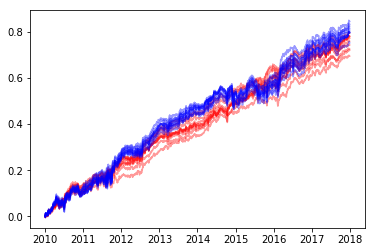

In [30]:
plt.figure()
plt.plot(comb0.best_results_returns.dropna().cumsum(), 'r', alpha=0.4)
plt.plot(combB.best_results_returns.dropna().cumsum(), 'b', alpha=0.4)
plt.show()

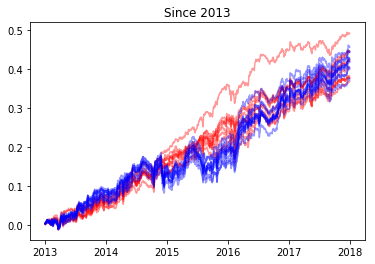

In [33]:
d = dt.date(2013, 1, 1)

plt.figure()
# V6 Switch
plt.plot(comb0.best_results_returns.loc[d:].dropna().cumsum(), 'r', alpha=0.4)
# Baseline
plt.plot(combB.best_results_returns.loc[d:].dropna().cumsum(), 'b', alpha=0.4)
plt.title('Since 2013')
plt.show()

In [31]:
df = pd.DataFrame()
df['V6Switch'] = get_stats(comb0.best_results_returns.dropna()).mean(axis=1)
df['Baseline'] = get_stats(combB.best_results_returns.dropna()).mean(axis=1)
df

,V6Switch,Baseline
Total,0.75566,0.80735
Mean,0.00039,0.00040
Std,0.00301,0.00390
Skew,0.36685,0.18831
Kurt,2.18000,2.25900
Sharpe,1.97492,1.62648
Sortino,3.72119,2.92784
MinRet,-0.01235,-0.01887
WinP,0.54736,0.54957
DD%,-0.04619,-0.06705


In [32]:
d = dt.date(2013, 1, 1)

df = pd.DataFrame()
df['V6Switch'] = get_stats(comb0.best_results_returns.loc[d:].dropna()).mean(axis=1)
df['Baseline'] = get_stats(combB.best_results_returns.loc[d:].dropna()).mean(axis=1)
df

,V6Switch,Baseline
Total,0.41370,0.42122
Mean,0.00033,0.00033
Std,0.00286,0.00363
Skew,0.24150,-0.01974
Kurt,2.15900,1.77700
Sharpe,1.81886,1.46602
Sortino,3.35093,2.56389
MinRet,-0.01183,-0.01570
WinP,0.54391,0.54552
DD%,-0.04619,-0.06705
